# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.301175e+01     1.337126e+01
 * time: 0.003094911575317383
     1     6.414342e+01     8.254629e+00
 * time: 0.009042978286743164
     2     5.572259e+01     9.434202e+00
 * time: 0.022954940795898438
     3     4.070533e+01     7.177255e+00
 * time: 0.04273200035095215
     4     2.828517e+01     6.503665e+00
 * time: 0.06218314170837402
     5     1.856557e+01     3.622695e+00
 * time: 0.07862210273742676
     6     1.226818e+01     2.477171e+00
 * time: 0.09277606010437012
     7     1.064680e+01     5.212502e+00
 * time: 0.10438394546508789
     8     9.180426e+00     2.746439e+00
 * time: 0.11861395835876465
     9     8.302610e+00     1.657784e+00
 * time: 0.17498111724853516
    10     7.909221e+00     2.513650e+00
 * time: 0.1867070198059082
    11     7.438299e+00     1.715053e+00
 * time: 0.19837093353271484
    12     7.041395e+00     1.696449e+00
 * time: 0.20955300331115723
    13     6.710319e+00     1.424178e+00
 * tim

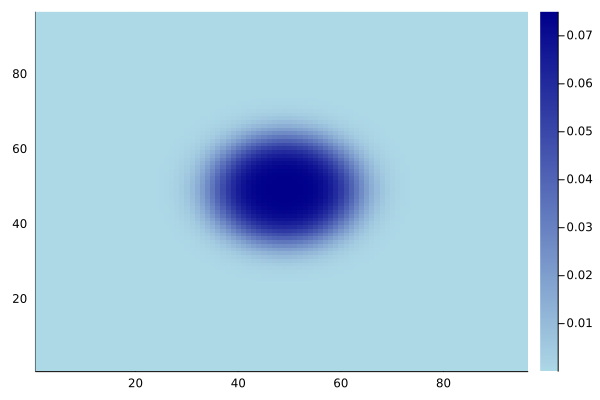

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))